if you need it please run all this code .
- !pip install chart_studio
- !pip install plotly --upgrade
- conda install -c plotly jupyter-dash

In [166]:
#!pip install chart_studio

# Interactive Dashboards Assignment:

Use a dataset of your choice and create a dynamic app inside of a notebook with 4 Dash components.

- Do not spend more than 30 mins looking for a dataset.
- Two of your Dash components can come from the examples covered in the lecture.
- Two Dash components must be a component we did not cover in the lecture. Find more components [here](https://dash.plotly.com/dash-core-components).

In [25]:
!pip install dash

In [6]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash_core_components as dcc
import plotly.express as px
import dash
import pandas as pd


I used [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance) from Kaggle 




In [7]:
# Load data
df = pd.read_csv('insurance.csv')
print(df.shape)
df.head()

(1338, 7)


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Columns

- `age:` age of primary beneficiary

- `sex:` insurance contractor gender, female, male

- `bmi:` Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- `children:` Number of children covered by health insurance / Number of dependents

- `smoker:` Smoking

- `region:` the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- `charges:` Individual medical costs billed by health insurance

In [9]:
df.describe(exclude= 'number')

sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364

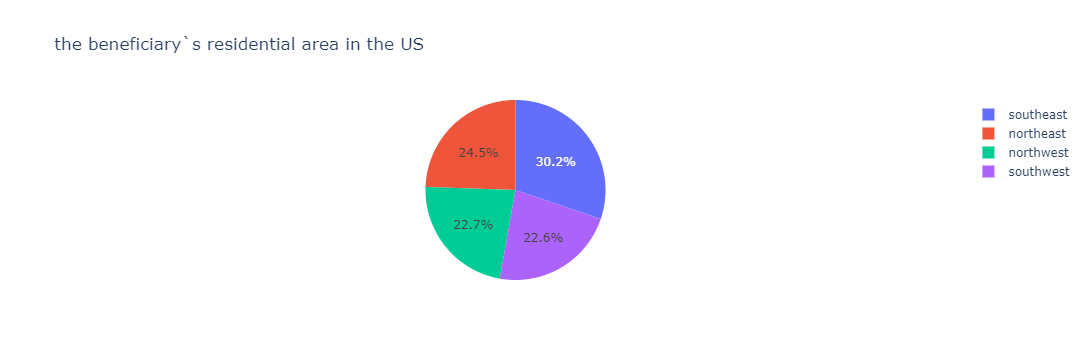

In [10]:
fig = px.pie(df, values='charges', names='region', title='the beneficiary`s residential area in the US')
fig.show()

In [11]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

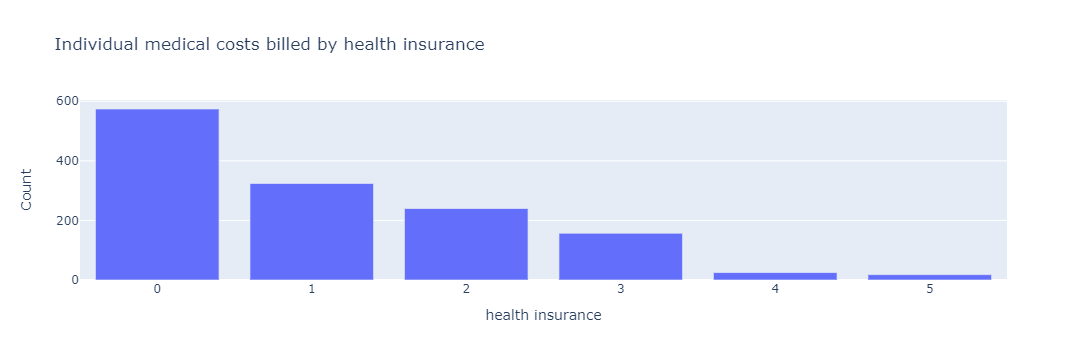

In [12]:
# Bar

px.bar(
    data_frame = df,
    x = df["children"].value_counts().index, # Grab labels 
    y = df["children"].value_counts().values, # Grab values
    title = "Individual medical costs billed by health insurance",
    labels={"x":"health insurance", "y":"Count"} # Re-label axis to appropriate names
)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


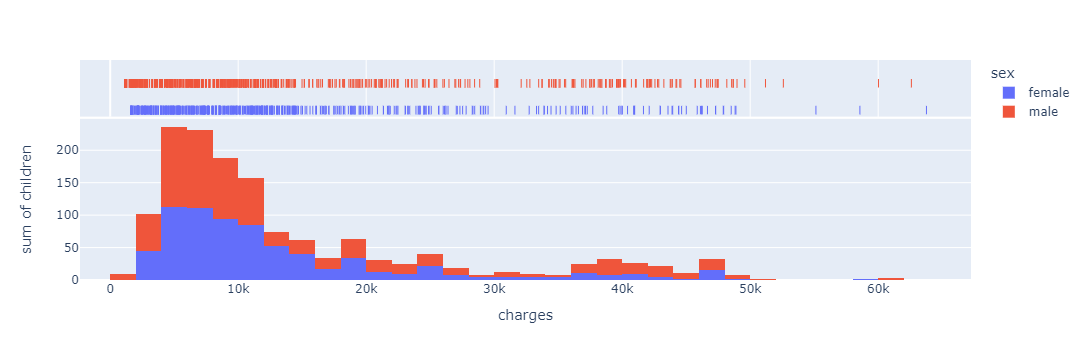

In [14]:
fig = px.histogram(df, x="charges", y="children", color="sex", marginal="rug", hover_data=df.columns)
fig.show()

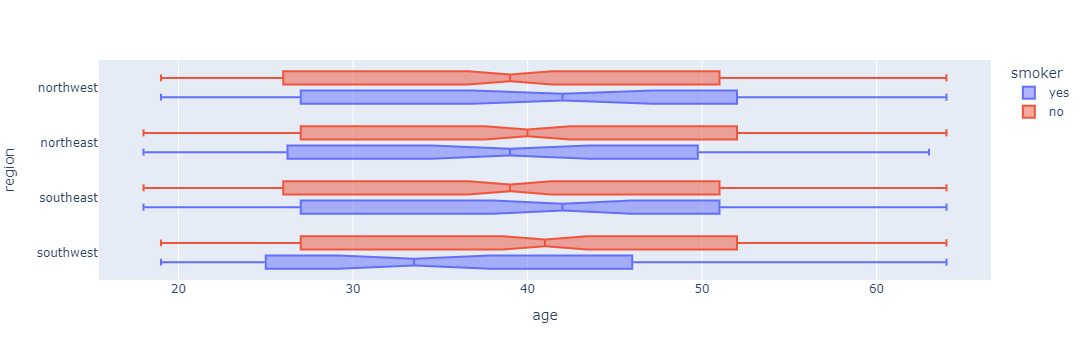

In [15]:
fig = px.box(df, x="age", y="region", color="smoker", notched=True)
fig.show()

In [21]:
app = JupyterDash(__name__) 
#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------


app.layout = html.Div([
    html.H4("Interactive Dashboards Assignment:"),
    
    html.Div(["your Name ",
              # id is used in callback 
              # value is the initial value 
              dcc.Input(id='my-input', value='', type='text')]),
    # for creating a space 
    html.Br(),
    # for displayign the output text 
    html.Div(id='my-output'),
                       html.H1("Medical Cost Personal Datasets"),

    html.Label('Region'),
    dcc.Dropdown(
        # The labels is what is going to be displayed to the user 
        # The value is going to be used as an input to code
    options=[
        {'label':df["region"].value_counts().index[0], 'value':df["region"].value_counts().values[0]},
        {'label':df["region"].value_counts().index[1], 'value':df["region"].value_counts().values[1]},
        {'label':df["region"].value_counts().index[2], 'value':df["region"].value_counts().values[2]},
        {'label':df["region"].value_counts().index[3], 'value':df["region"].value_counts().values[3]}
    ],
    # default 
    value='SF'
),dcc.Graph(
    figure={
        'data': [
            {'x': df["children"].value_counts().index, 'y':  df["children"].value_counts().values, 'type': 'bar', 'name': 'children'},
            #{'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
        ],
        'layout': {
            'title': 'Individual medical costs billed by health insurance'
        }
    }
)
    ,dcc.Markdown('Context`: Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend.All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book`.'),
    
    html.Div(id='tabs-content-props-4'),
    html.Div(id='tabs-example-content-1'),

                      ])
#------------------------------------------------------------------------------------------------------------------

#------------------------------------------------------------------------------------------------------------------
@app.callback(
    [Output(component_id='my-output', component_property='children')],
    [Input(component_id='my-input', component_property='value')]
    
)


def update_output_div(input_value):
    # The return is a string
    return 'Welcome: {}'.format(input_value)

#--------------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
if __name__ == '__main__':
    app.run_server(mode="inline", debug=False,port=301)

127.0.0.1 - - [13/Jan/2022 15:35:22] "GET /_shutdown_44d48f17-bb9f-493a-9ba9-26f5e1750407 HTTP/1.1" 200 -
 * Running on http://127.0.0.1:301/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Jan/2022 15:35:22] "GET /_alive_44d48f17-bb9f-493a-9ba9-26f5e1750407 HTTP/1.1" 200 -


127.0.0.1 - - [13/Jan/2022 15:35:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Jan/2022 15:35:22] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [13/Jan/2022 15:35:23] "GET /_dash-dependencies HTTP/1.1" 200 -


In [ ]:
    Output('dd-output-container', 'children'),
    Input('demo-dropdown', 'value')